# Clustering 


### Libraries that we need 


In [12]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import  datasets, mixture
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
%matplotlib inline

In [2]:
## Load the data
data0 = pd.read_csv ("variables.csv", sep= ';')
data0.head(3)

,Unnamed: 0,SOA25,SOA5,CPT_d,CPT_bias,WCSTCAT,WCSTKORR,WCSTERR,WCSTPERS
0,s001,0.452403,-0.288127,-0.494538,-1.326479,0.341496,1.622519,-1.725504,-0.593216
1,s002,1.400965,1.371340,-1.074768,0.226969,-0.352461,0.313946,-0.674500,0.244372
2,s003,0.824134,2.001075,-2.329321,-1.447151,-1.112946,-0.288403,0.416246,0.000000


In [3]:
# data we use for the clustering : 
data = data0.head(227)
#transform our data into a numpy array and select the features we want 
X = data.iloc[:, 1:].to_numpy() 
print (X) #This is the matrix of the features

[[ 0.45240274 -0.28812716 -0.49453761 ...  1.62251913 -1.72550438
  -0.59321567]
 [ 1.40096511  1.37133961 -1.07476799 ...  0.31394631 -0.6745
   0.2443716 ]
 [ 0.82413446  2.0010753  -2.32932125 ... -0.28840274  0.41624591
   0.        ]
 ...
 [-0.04488637 -0.0475135  -0.3198633  ...  0.          0.
   0.        ]
 [ 0.2766019  -0.4039914   1.15033943 ... -1.70561767  1.55586242
   1.70716819]
 [ 0.49279238 -0.43825635  0.88498781 ...  0.65404473 -1.43913319
  -1.87146163]]


## Density based : BDSCAN

-0.21926225570936644
-0.21411046671795494
-0.21411046671795494
-0.25453208115066217
-0.24363725600873573
-0.2016849491107945
-0.09736179904439052
-0.09531153458130694
-0.1589283132125881
-0.2076465751623575
-0.20645424736749907
-0.2118055447309842
-0.10389097757333525
-0.08228223018666157


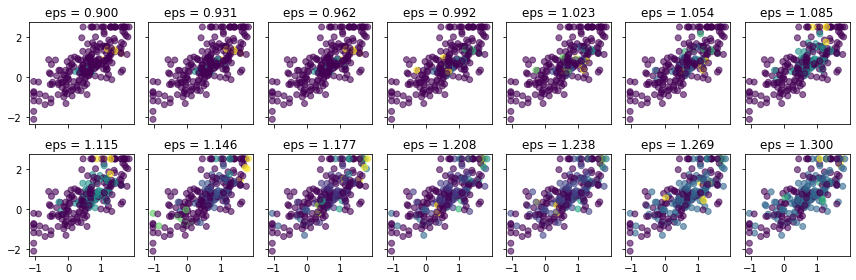

In [31]:
eps_list = np.linspace(0.9,1.3,14)
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize = (12, 4), sharey = True, sharex = True)

for i in range (0, len(eps_list)):
    eps = eps_list[i]
    column = i%COLUMNS 
    row= i//COLUMNS 
    
    ax = axs[row, column ]
    labels = DBSCAN (eps= eps).fit_predict(X)
    print (silhouette_score (X, labels))
    ax.scatter(X[:,0], X[:,1], c = labels, alpha = 0.6)
    #ax.scatter(X_reduced_tnse[:,0], X_reduced_tnse[:,1], c = labels, alpha = 0.6)
    ax.set_title("eps = {:.3f}".format(eps))
plt.tight_layout()


As you can see, DBSCAN is not efficient in our case. This can come from the fact that we are in a space of dimension 7. 